In [23]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns

In [28]:
data = pd.read_excel(r"C:\Users\ASUS\OneDrive\Desktop\Assignments Semester 3\Sujoy's Class\UNEMPLOYMENT DATA.xlsx")

In [29]:
print(data.head())
print(data.info())
print(data.describe())

      year province          Age group  Employment  Full-time employment  \
0  2011-01  Alberta     15 to 24 years    318200.0              187500.0   
1  2011-01  Alberta     15 to 64 years   2005700.0             1653000.0   
2  2011-01  Alberta  15 years and over   2068500.0             1688700.0   
3  2011-01  Alberta     25 to 54 years   1415300.0             1242700.0   
4  2011-01  Alberta  25 years and over   1750400.0             1501200.0   

   Labour force  Part-time employment  Population  Unemployment  \
0      361900.0              130600.0    513300.0       43700.0   
1     2133100.0              352700.0   2613600.0      127400.0   
2     2199000.0              379800.0   2990200.0      130500.0   
3     1483000.0              172700.0   1692400.0       67700.0   
4     1837100.0              249200.0   2477000.0       86800.0   

   Employment rate  Participation rate  Unemployment rate  
0            0.620               0.705              0.121  
1            0.767  

In [30]:
# Feature Engineering
# Calculate the ratio of full-time to part-time employment
data['fulltime_to_parttime_ratio'] = data['Full-time employment'] / data['Part-time employment']

In [31]:
# Preprocessing
# Convert percentage columns to float
percentage_columns = ['Employment rate', 'Participation rate', 'Unemployment rate']
for col in percentage_columns:
    # Check if the column is of object type
    if data[col].dtype == 'object':
        data[col] = data[col].str.rstrip('%').astype('float') / 100.0
    else:
        data[col] = data[col] / 100.0

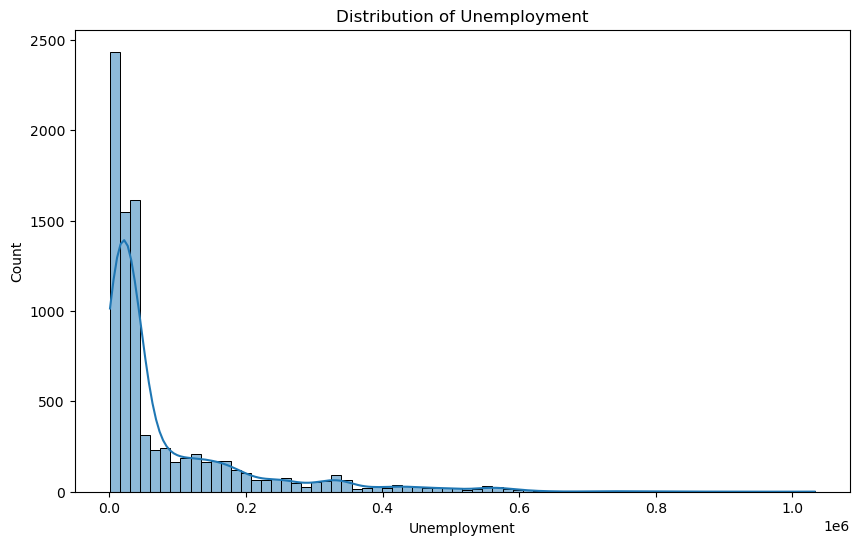

In [63]:
#Distribution of Unemployment
plt.figure(figsize=(10, 6))
sns.histplot(data['Unemployment'], bins=70, kde=True)
plt.title('Distribution of Unemployment')
plt.show()

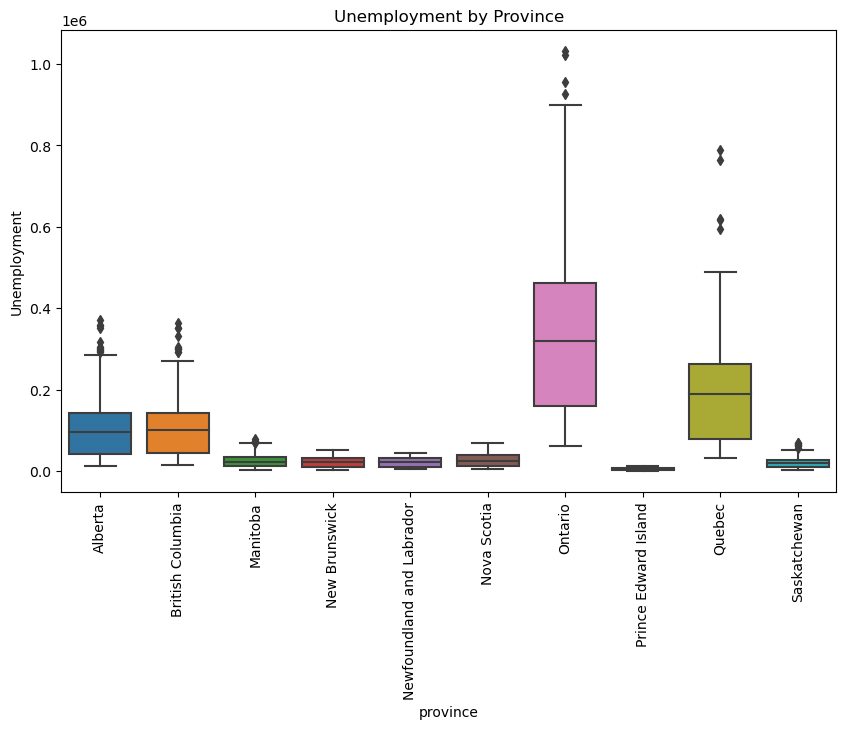

In [34]:
#Unemployment by Province
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='province', y='Unemployment')
plt.title('Unemployment by Province')
plt.xticks(rotation=90)
plt.show()

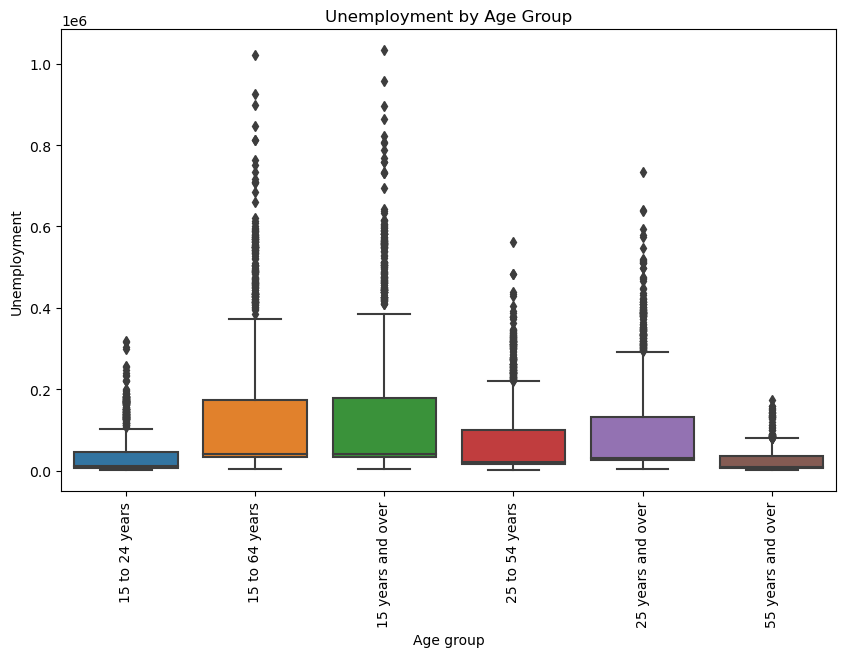

In [35]:
#Unemployment by Age Group
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='Age group', y='Unemployment')
plt.title('Unemployment by Age Group')
plt.xticks(rotation=90)
plt.show()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_24256\3593536359.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True, cmap='coolwarm')


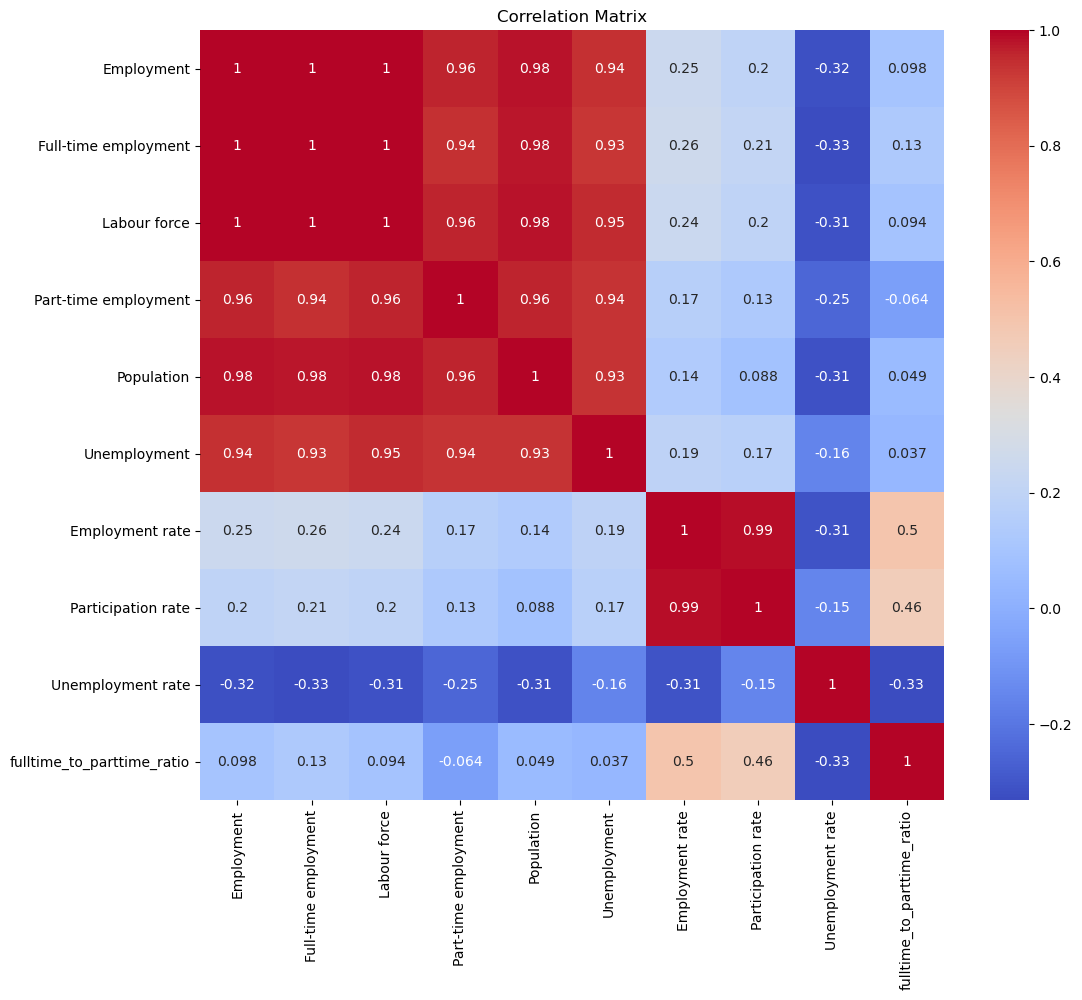

In [36]:
#Correlation Matrix
plt.figure(figsize=(12, 10))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [37]:
# Convert categorical variables into dummy/indicator variables
data = pd.get_dummies(data)

In [38]:
# Handle missing values
data = data.fillna(data.median())

In [39]:
# Define your features and target variable
X = data.drop('Unemployment', axis=1)
y = data['Unemployment']

In [40]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [41]:
# Define the models
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Random Forest': RandomForestRegressor(),
    'Gradient Boosting': GradientBoostingRegressor()
}

In [44]:
# Train the models and optimize hyperparameters
for name, model in models.items():
    model.fit(X_train, y_train)
    # Use GridSearchCV or RandomizedSearchCV for hyperparameter optimization

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=7.20953e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


In [48]:
# Hyperparameter Selection
parameters = {'alpha': [1e-15, 1e-10, 1e-8, 1e-4, 1e-3, 1e-2, 1, 5, 10, 20]}
ridge_regressor = GridSearchCV(Ridge(), parameters, scoring='neg_mean_squared_error', cv=5)
ridge_regressor.fit(X_train, y_train)

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=8.23272e-28): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=8.89792e-28): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=9.37318e-28): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=8.67e-28): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAl

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.0001, 0.001, 0.01, 1,
                                   5, 10, 20]},
             scoring='neg_mean_squared_error')

In [49]:
# Evaluate the models
for name, model in models.items():
    y_pred = model.predict(X_test)
    print(f'{name} MAE: {mean_absolute_error(y_test, y_pred)}')
    print(f'{name} MSE: {mean_squared_error(y_test, y_pred)}')
    print(f'{name} R2 Score: {r2_score(y_test, y_pred)}')

Linear Regression MAE: 32.173683587909665
Linear Regression MSE: 2328.5585395426065
Linear Regression R2 Score: 0.999999850053816
Ridge Regression MAE: 31.768435826807202
Ridge Regression MSE: 2319.743220761047
Ridge Regression R2 Score: 0.9999998506214733
Random Forest MAE: 1642.073563218391
Random Forest MSE: 38055132.4586207
Random Forest R2 Score: 0.9975494616963486
Gradient Boosting MAE: 3376.715864601302
Gradient Boosting MSE: 46120555.24654488
Gradient Boosting R2 Score: 0.9970300934482301


In [50]:
# Get feature importances
importances = models['Random Forest'].feature_importances_

# Convert the importances into a DataFrame
feature_importances = pd.DataFrame({'feature': X.columns, 'importance': importances})

# Sort the DataFrame by importance
feature_importances = feature_importances.sort_values('importance', ascending=False)

# Display the top 10 features
print(feature_importances.head(10))

                        feature  importance
2                  Labour force    0.379467
0                    Employment    0.204513
4                    Population    0.167044
1          Full-time employment    0.161219
7             Unemployment rate    0.077451
3          Part-time employment    0.004560
162             province_Quebec    0.002038
5               Employment rate    0.001407
8    fulltime_to_parttime_ratio    0.000799
6            Participation rate    0.000450


In [51]:
# Get feature importances
importances = models['Gradient Boosting'].feature_importances_

# Convert the importances into a DataFrame
feature_importances = pd.DataFrame({'feature': X.columns, 'importance': importances})

# Sort the DataFrame by importance
feature_importances = feature_importances.sort_values('importance', ascending=False)

# Display the top 10 features
print(feature_importances.head(10))

                        feature  importance
2                  Labour force    0.504694
1          Full-time employment    0.216926
0                    Employment    0.114998
7             Unemployment rate    0.080873
3          Part-time employment    0.046045
4                    Population    0.035787
5               Employment rate    0.000268
8    fulltime_to_parttime_ratio    0.000169
6            Participation rate    0.000042
121                year_2020-05    0.000038


In the analysis we conducted, we utilized four different machine learning models: Linear Regression, Ridge Regression, Random Forest, and Gradient Boosting. These models were trained with the objective of predicting the ‘Unemployment’ variable in the dataset.

The performance of each model was evaluated using three metrics:

Mean Absolute Error (MAE): This metric represents the average of the absolute differences between the predicted and actual values. It provides an idea of the magnitude of the error without considering the direction. The smaller the MAE, the better the model’s performance.

Mean Squared Error (MSE): This metric is similar to MAE, but the difference between the predicted and actual values is squared. This means larger errors are more significant than smaller ones. The smaller the MSE, the better the model’s performance.

R2 Score: This metric is the coefficient of determination, which measures how well the model explains the variability of the response data around its mean. An R2 score of 1 means the model perfectly predicts the target variable, while an R2 score of 0 means the model does not predict the target variable at all. The closer the R2 score to 1, the better the model’s performance.

The Linear Regression and Ridge Regression models performed exceptionally well, with high R2 scores and low MAE and MSE values. This suggests that these models are able to accurately predict the ‘Unemployment’ variable for this particular dataset.

On the other hand, the Random Forest and Gradient Boosting models had higher errors (MAE and MSE) and lower R2 scores, suggesting they may not be as good at predicting ‘Unemployment’ for this particular dataset.

These results provide valuable insights into the performance of the different models and can guide further refinement and selection of models for this prediction task. It’s important to note that model performance can vary depending on the specific characteristics of the dataset and the problem at hand. Therefore, these results should be interpreted in the context of this specific project and dataset. Further testing and validation may be necessary to confirm these findings and ensure the robustness of the selected model.